<a href="https://colab.research.google.com/github/muzeyir/gene-expression-cancer-classification/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Capstone Project: Disease Classification from Gene Expression Data

## 🎯 Objective:
The goal of this project is to classify the **type of cancer** based on gene expression data from various samples. The dataset includes expression levels for 20,532 genes across 801 patient samples.

We aim to:
- Perform data cleaning and exploratory analysis
- Reduce high-dimensional features (PCA, t-SNE)
- Build multi-class classification models
- Interpret model predictions using SHAP or similar tools

---

**Classes (Cancer Types):**
- BRCA: Breast cancer
- LUAD: Lung cancer
- PRAD: Prostate cancer
- KIRC: Kidney cancer
- COAD: Colon cancer
---

**Dataset Overview:**
- `data.csv` — gene expression matrix (801 samples × 20,532 genes)
- `labels.csv` — target class for each sample (cancer or not)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


data_path = '/content/drive/MyDrive/data-for-capstone-project/data.csv'
label_path = '/content/drive/MyDrive/data-for-capstone-project/labels.csv'

df_data = pd.read_csv(data_path)
df_label = pd.read_csv(label_path)



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
sns.set(style = 'whitegrid')

print('Features : ', df_data.shape)
print('Labels : ', df_label.shape)

Features :  (801, 20532)
Labels :  (801, 2)


  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA
Columns :  Index(['Unnamed: 0', 'Class'], dtype='object')


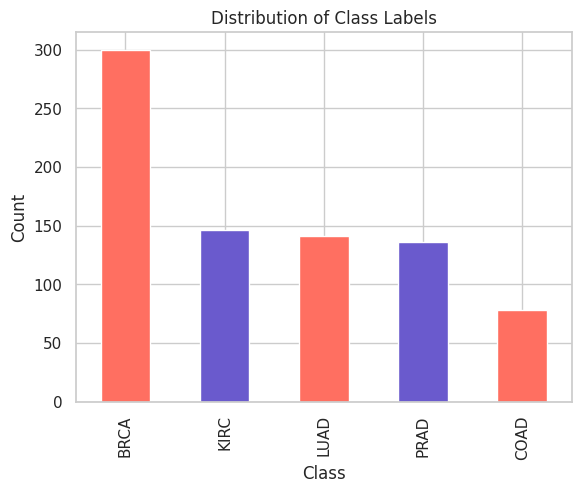

In [5]:
print(df_label.head())

print('Columns : ', df_label.columns)
label_col = df_label.columns[1]
df_label[label_col].value_counts().plot(kind='bar', color=['#ff6f61','#6a5acd'])
plt.title('Distribution of Class Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Total missing values :  0
        count      mean       std       min       25%       50%        75%  \
gene_0  801.0  0.026642  0.136850  0.000000  0.000000  0.000000   0.000000   
gene_1  801.0  3.010909  1.200828  0.000000  2.299039  3.143687   3.883484   
gene_2  801.0  3.095350  1.065601  0.000000  2.390365  3.127006   3.802534   
gene_3  801.0  6.722305  0.638819  5.009284  6.303346  6.655893   7.038447   
gene_4  801.0  9.813612  0.506537  8.435999  9.464466  9.791599  10.142324   

              max  
gene_0   1.482332  
gene_1   6.237034  
gene_2   6.063484  
gene_3  10.129528  
gene_4  11.355621  


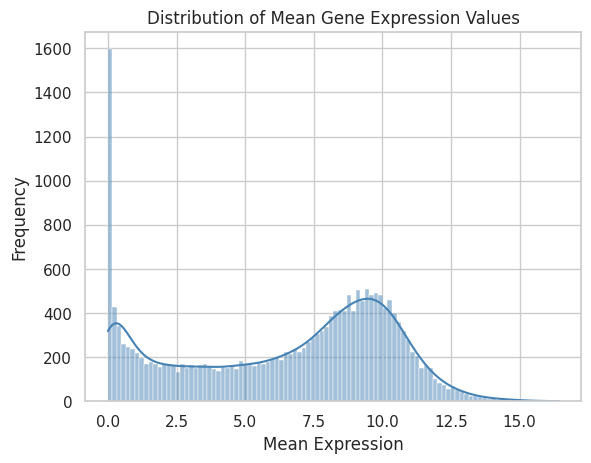

In [6]:
null_counts = df_data.isnull().sum().sum()
print('Total missing values : ', null_counts)

desc = df_data.describe().T
print(desc.head())

df_numeric = df_data.select_dtypes(include = [np.number])

gene_means = df_numeric.mean(axis=0)
sns.histplot(gene_means, bins = 100, kde = True, color = 'steelblue')
plt.title('Distribution of Mean Gene Expression Values')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

df_data_clean = df_data.drop(columns = ['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_data_clean)

print('Original shape : ', df_data_clean.shape)
print('Scaled shape : ', X_scaled.shape)

Original shape :  (801, 20531)
Scaled shape :  (801, 20531)


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

print('PCA shape :', X_pca.shape)

PCA shape : (801, 2)


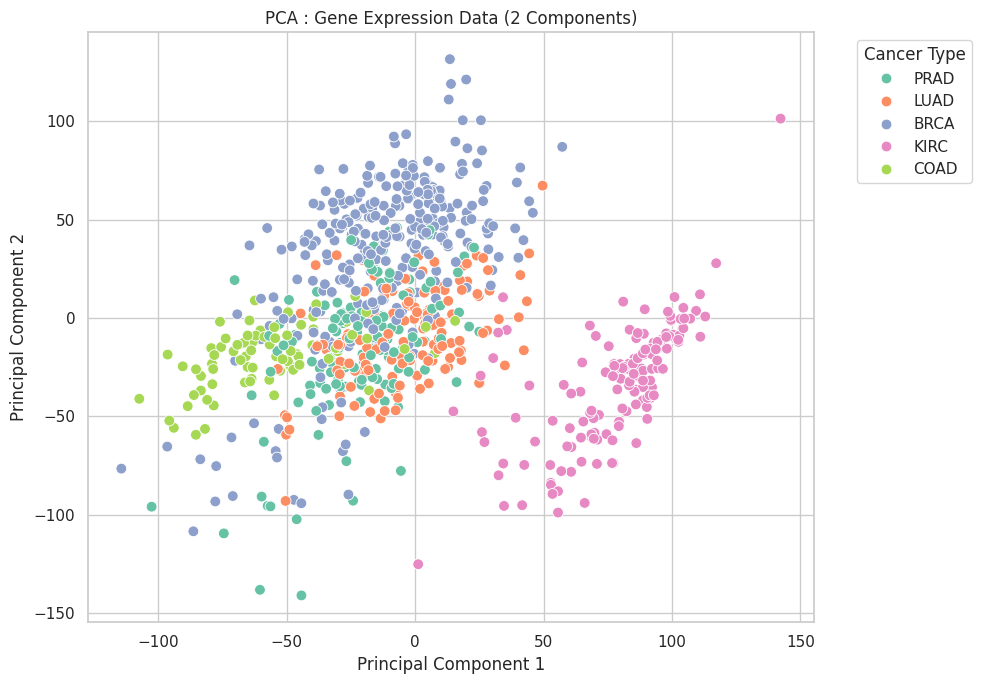

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df_label['Class']

plt.figure(figsize = (10,7))
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = labels, palette = 'Set2', s = 60)
plt.title('PCA : Gene Expression Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Cancer Type', bbox_to_anchor=(1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

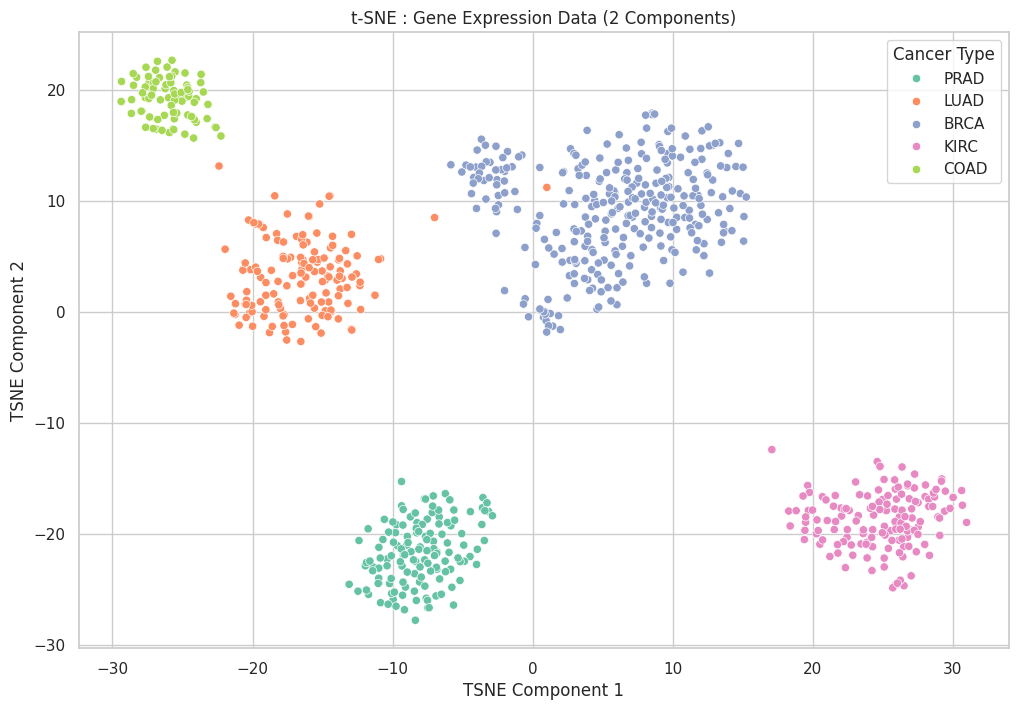

t-SNE shape :  (801, 2)


In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 30, max_iter = 1000, random_state = 42)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=X_tsne, columns = ['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Cancer Type'] = df_label['Class']

plt.figure(figsize = (12,8))
sns.scatterplot(data = df_tsne, x = 'TSNE Component 1', y= 'TSNE Component 2', hue = 'Cancer Type', palette = 'Set2')
plt.title('t-SNE : Gene Expression Data (2 Components)')
plt.show()

print('t-SNE shape : ', X_tsne.shape)

In [11]:
print(df_label.head())
print(df_label.columns)

  Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA
Index(['Unnamed: 0', 'Class'], dtype='object')


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_label['Class'], test_size=0.2, random_state=42, stratify=df_label['Class'])

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf_model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\nClassification Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9875776397515528

Classification Report : 
               precision    recall  f1-score   support

        BRCA       0.97      1.00      0.98        60
        COAD       1.00      1.00      1.00        16
        KIRC       1.00      1.00      1.00        30
        LUAD       1.00      0.93      0.96        28
        PRAD       1.00      1.00      1.00        27

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



<Figure size 800x600 with 0 Axes>

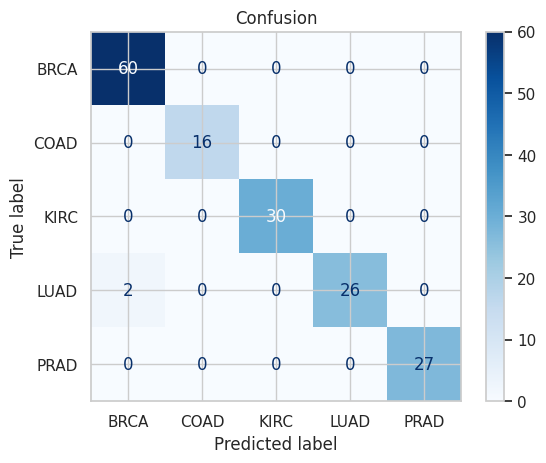

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = rf_model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', values_format = 'd')
plt.title('Confusion')
plt.show()